In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt



2025-05-08 15:47:26.081055: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 15:47:26.388541: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 15:47:26.550860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746719246.928955    3833 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746719247.004285    3833 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746719247.787493    3833 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [ ]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


| Label | Clase                       |
|-------|-----------------------------|
| 0     | avión (airplane) ✈️         |
| 1     | automóvil (automobile) 🚗    |
| 2     | pájaro (bird) 🐦             |
| 3     | gato (cat) 🐱                |
| 4     | ciervo (deer) 🦌             |
| 5     | perro (dog) 🐶               |
| 6     | rana (frog) 🐸               |
| 7     | caballo (horse) 🐴           |
| 8     | barco (ship) 🚢              |
| 9     | camión (truck) 🚚            |


In [3]:
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

In [4]:
y_train_full

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
train_filter = np.where((y_train_full == 0) | (y_train_full == 2))
test_filter = np.where((y_test_full == 0) | (y_test_full == 2))

In [6]:
train_filter

(array([    6,    13,    18, ..., 49992, 49994, 49995]),)

In [7]:
type(test_filter)

tuple

In [8]:
X_train, y_train = X_train_full[train_filter], y_train_full[train_filter]
X_test, y_test = X_test_full[test_filter], y_test_full[test_filter]

In [9]:
X_train

array([[[[164, 206,  84],
         [105, 140,  61],
         [118, 148, 101],
         ...,
         [109, 147,  73],
         [108, 147,  69],
         [ 91, 129,  57]],

        [[167, 213,  84],
         [116, 160,  49],
         [ 72, 109,  43],
         ...,
         [105, 142,  79],
         [105, 142,  72],
         [ 89, 127,  57]],

        [[140, 191,  65],
         [142, 193,  66],
         [119, 163,  79],
         ...,
         [104, 139,  84],
         [ 84, 120,  58],
         [ 78, 115,  49]],

        ...,

        [[139, 148,  81],
         [142, 155,  74],
         [135, 156,  72],
         ...,
         [ 89, 134,  28],
         [ 97, 148,  24],
         [126, 176,  49]],

        [[163, 157,  85],
         [153, 164,  82],
         [146, 164,  90],
         ...,
         [ 85, 130,  19],
         [ 98, 148,  27],
         [127, 178,  48]],

        [[183, 153, 102],
         [176, 182, 116],
         [154, 154, 100],
         ...,
         [ 94, 134,  29],
        

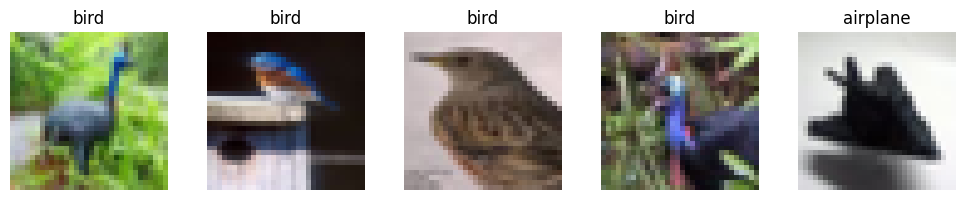

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

indices = np.where((y_train == 0) | (y_train == 2))[0]

plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])
    label = class_names[y_train[idx]]
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
y_train = (y_train == 2).astype(np.uint8) # true en 1 (perro) , false en 0 (gato).
y_test = (y_test == 2).astype(np.uint8)

In [12]:
type(X_train)

numpy.ndarray

In [13]:
len(X_train)

10000

In [14]:
X_train[0].shape

(32, 32, 3)

In [15]:
y_train

array([1, 1, 1, ..., 0, 0, 1], dtype=uint8)

In [16]:
y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (10000, 32, 32, 3), y_train shape: (10000,)


In [19]:
model = Sequential([

    # Capa 1: Convolucional
    Conv2D(
        filters=32,               # 🧩 Número de filtros
        kernel_size=(3, 3),       # 📏 Tamaño del filtro (kernel)
        activation='relu',       # ⚡ Función de activación
        input_shape=(32, 32, 3)   # 📷 Tamaño de la imagen de entrada (alto, ancho, canales)
    ),

    # Capa 2: MaxPooling
    MaxPooling2D(
        pool_size=(2, 2)          # 🌀 Tamaño de la ventana de pooling (reducción de tamaño)
    ),

    # Capa 3: Convolucional
    Conv2D(
        filters=64,               # 🧩 Más filtros para capturar más patrones complejos
        kernel_size=(3, 3),       # 📏 Mismo tamaño de kernel
        activation='relu'        # ⚡ Activación ReLU
    ),

    # Capa 4: MaxPooling
    MaxPooling2D(
        pool_size=(2, 2)          # 🌀 Mismo tamaño de pooling
    ),

    # Capa 5: Aplanar los mapas de activación
    Flatten(),                   # 🔁 Convierte la salida 2D a un vector 1D

    # Capa 6: Densa (oculta)
    Dense(
        units=64,                # 🔢 Número de neuronas
        activation='relu'        # ⚡ Activación ReLU
    ),

    # Capa 7: Densa (salida)
    Dense(
        units=1,                 # 🔘 Clasificación binaria (0 o 1)
        activation='sigmoid'     # ✅ Activación Sigmoide para salida entre 0 y 1
    )
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='auc')])

model.summary()

/workspaces/ArtinKemanian_Notebook/env1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-08 15:50:39.420261: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,977 (652.25 KB)

 Trainable params: 166,977 (652.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
len(X_train)

10000

In [21]:
len(X_test)

2000

In [22]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/20


2025-05-08 15:50:50.821244: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


  5/157 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - auc: 0.5228 - loss: 0.7062

2025-05-08 15:50:52.214106: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-05-08 15:50:52.216120: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-05-08 15:50:52.259407: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-05-08 15:50:52.261348: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - auc: 0.7971 - loss: 0.5366 - val_auc: 0.9309 - val_loss: 0.3430
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - auc: 0.9243 - loss: 0.3519 - val_auc: 0.9399 - val_loss: 0.3175
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9367 - loss: 0.3211 - val_auc: 0.9490 - val_loss: 0.2909
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - auc: 0.9495 - loss: 0.2890 - val_auc: 0.9500 - val_loss: 0.3055
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - auc: 0.9567 - loss: 0.2672 - val_auc: 0.9505 - val_loss: 0.3077
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - auc: 0.9657 - loss: 0.2388 - val_auc: 0.9565 - val_loss: 0.2677
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9677 - loss: 0.2302 - val_auc: 0.9587 - val_loss: 0.2645
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - auc: 0.9657 - loss: 0.2375 - val_auc: 0.9593 - val_loss: 0.2583
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - a

37/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
AUC Score: 0.9619


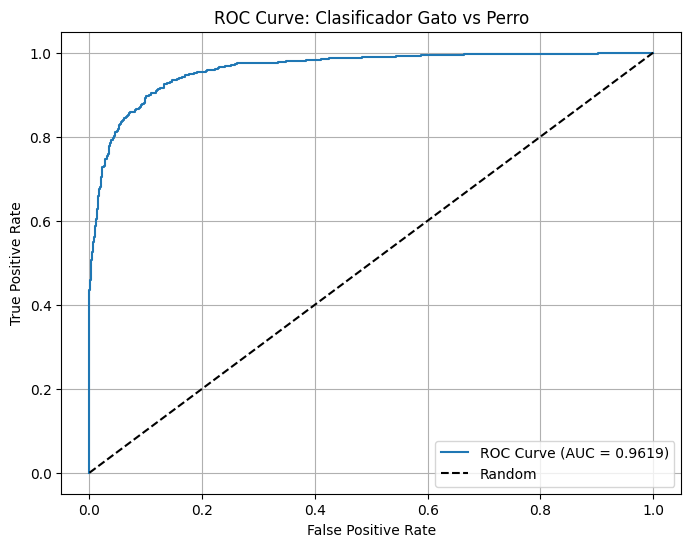

In [23]:
y_proba = model.predict(X_test).flatten()

auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Clasificador Gato vs Perro')
plt.legend()
plt.grid(True)
plt.show()